In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
from sklearn.manifold import TSNE

In [42]:
ROWS = 181
COLS = 255

def load_labels(path):
    labels = np.empty((ROWS*COLS,), dtype=np.int32)
    for i, line in enumerate(open(path)):
        value = int(line)
        labels[i] = value    
    return labels

def load_means(path, cluster_num):
    labels = np.empty((cluster_num, 3), dtype=np.int32)
    for i, line in enumerate(open(path)):
        line = line.strip('[]\n')
        values = [int(v) for v in line.split(',')]
        
        print('[{}]: {}'.format(i, values))

In [24]:
# 画像の読み込み
image = cv2.imread('./sample_2.jpeg')
image = image.reshape((ROWS * COLS, 3)).astype(np.float32) / 255.0
print(image.shape)
print(image[21*81])

(46155, 3)
[ 1.          0.67843139  0.49019608]


In [7]:
 reduced_array = TSNE(n_components=2, random_state=0).fit_transform(image)

In [82]:
CLUSTER_NUM = 3

In [83]:
# ラベルの読み込み
labels = load_labels('./labels_{}.txt'.format(CLUSTER_NUM))
print(labels.shape)

(46155,)


In [84]:
# 平均値の読み込み
means = load_means('./means_{}.txt'.format(CLUSTER_NUM), CLUSTER_NUM)

[0]: [13, 60, 58]
[1]: [252, 195, 151]
[2]: [60, 169, 210]


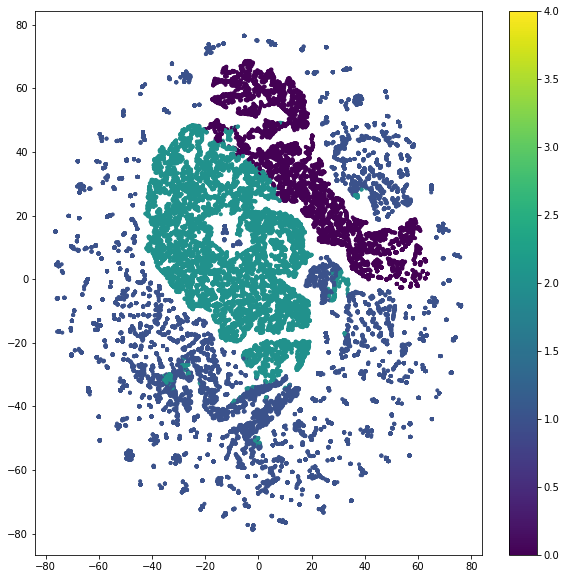

In [85]:
plt.figure(figsize=(10,10))
plt.scatter(reduced_array[:, 0], reduced_array[:, 1], c=labels, marker='.', vmin=0, vmax=4)
plt.colorbar()
plt.show()